In [245]:
import numpy as np
import pandas as pd

In [246]:
df = pd.read_csv("email.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## 1 : Data Cleaning

In [247]:
df.shape

(5573, 2)

In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5573 non-null   object
 1   Message   5573 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [249]:
df.rename(columns = {"Category" : "Target" , "Message" : "Mails"}, inplace = True)
df.head()

,Target,Mails
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [250]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [251]:
df["Target"] = encoder.fit_transform(df["Target"])

In [252]:
df.head()

,Target,Mails
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [253]:
#missing values
df.isnull().sum()

Target    0
Mails     0
dtype: int64

In [254]:
#check for duplicate values
df.duplicated().sum()

415

In [256]:
df = df.drop_duplicates(keep = "first")
df.shape

(5158, 2)

In [257]:
df.duplicated().sum()

0

In [20]:
df.loc[df["Target"] == 2]

,Target,Mails
5572,2,isActive:false}


## 2 : EDA

In [258]:
#how many spams and hams messages
df["Target"].value_counts()

Target
0    4516
1     641
2       1
Name: count, dtype: int64

In [259]:
df.drop(df[df["Target"] == 2].index, inplace = True)

In [260]:
df["Target"].value_counts()

Target
0    4516
1     641
Name: count, dtype: int64

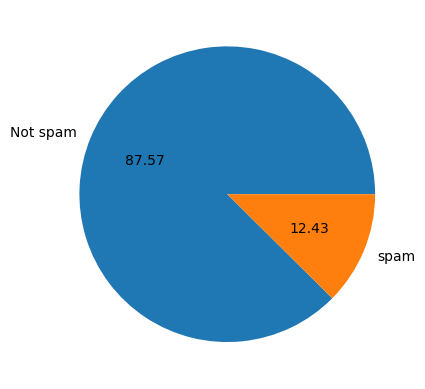

In [261]:
import matplotlib.pyplot as plt
plt.pie(df["Target"].value_counts(), labels = ["Not spam", "spam"], autopct = "%0.2f")
plt.show()

# This shows that data is imbalanced

In [262]:
!pip install nltk

In [263]:
import nltk

In [264]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to C:\Users\UBADA
[nltk_data]     DAWOOD\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [266]:
#finding number of characters in each mails
df["num_of_char"] = df["Mails"].apply(len)
df.head()

,Target,Mails,num_of_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [269]:
#finding number of words in each mails
df["Mails"].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568      [Will, ü, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: Mails, Length: 5157, dtype: object

In [270]:
df["num_of_words"] = df["Mails"].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,Target,Mails,num_of_char,num_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [271]:
#finding number of sentences in each mails
df["num_of_sent"] = df["Mails"].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,Target,Mails,num_of_char,num_of_words,num_of_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [272]:
df[["num_of_char", "num_of_words", "num_of_sent"]].describe()

,num_of_char,num_of_words,num_of_sent
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.560403,1.969750
std,58.382922,13.405970,1.455526
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [273]:
#applying describe() function on only ham messages
df[df["Target"] == 0][["num_of_char", "num_of_words", "num_of_sent"]].describe()

,num_of_char,num_of_words,num_of_sent
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.267715,1.827724
std,56.708301,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [275]:
#applying describe() function on spam messages
df[df["Target"] == 1][["num_of_char", "num_of_words", "num_of_sent"]].describe()

,num_of_char,num_of_words,num_of_sent
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.970359
std,30.399707,7.103501,1.485575
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [276]:
import seaborn as sns

C:\Users\UBADA DAWOOD\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\UBADA DAWOOD\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_of_char', ylabel='Count'>

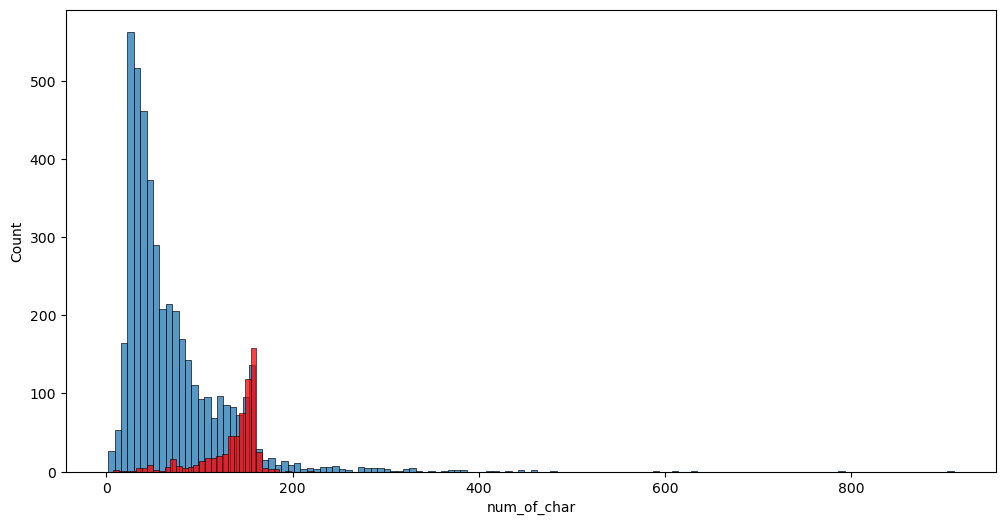

In [278]:
#plotting histplot for spam and ham
plt.figure(figsize = (12,6))
sns.histplot(df[df["Target"] == 0]["num_of_char"])
sns.histplot(df[df["Target"] == 1]["num_of_char"], color = "red")

C:\Users\UBADA DAWOOD\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\UBADA DAWOOD\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_of_words', ylabel='Count'>

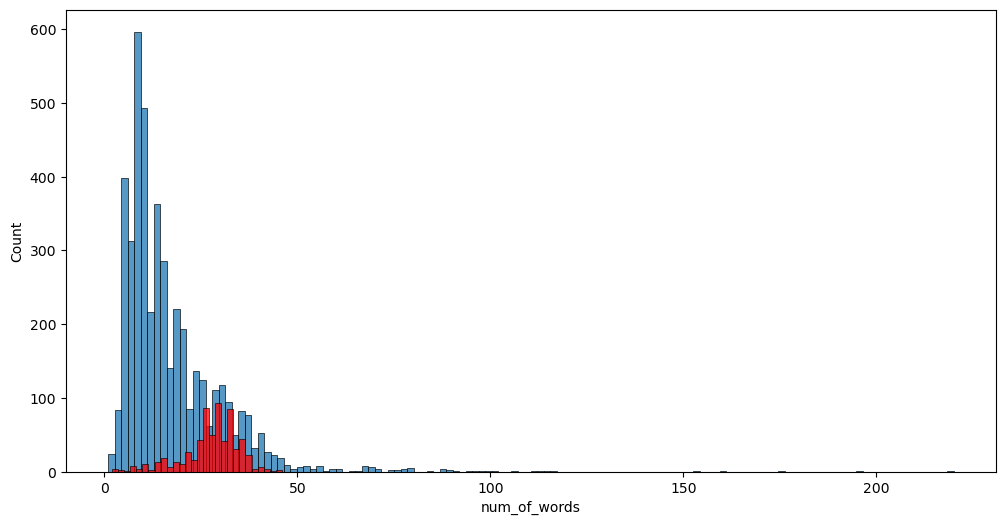

In [279]:
#for num_of_words
plt.figure(figsize = (12, 6))
sns.histplot(df[df["Target"] == 0]["num_of_words"])
sns.histplot(df[df["Target"] == 1]["num_of_words"], color = "red")

C:\Users\UBADA DAWOOD\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\UBADA DAWOOD\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\UBADA DAWOOD\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


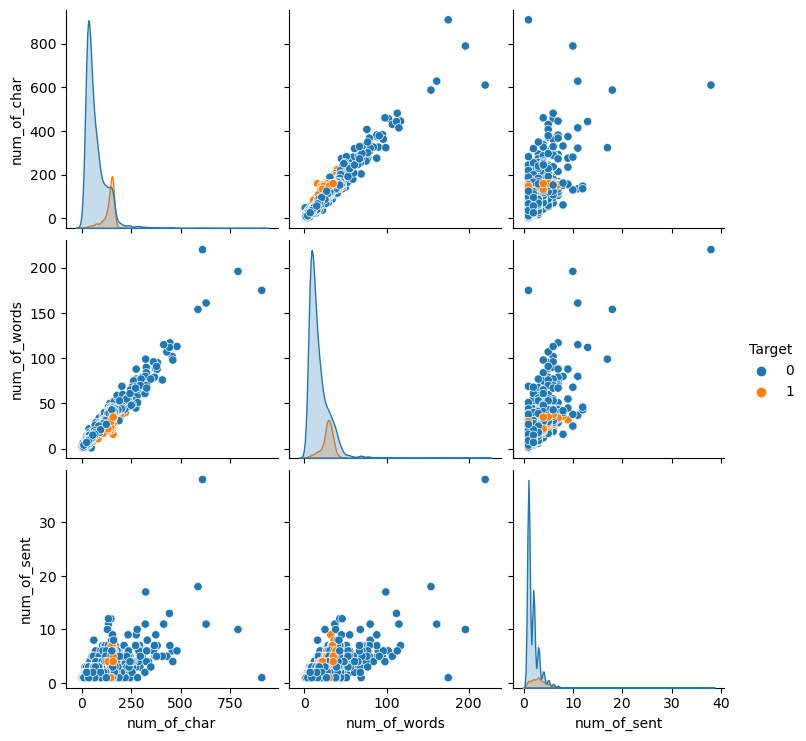

In [280]:
#seeing relations of chars, words and sents to each other
sns.pairplot(df, hue = "Target")

## 2 : Text preprocessing
 lower casing
 
 tokenization
 
 removing special character
 
 removing stop words and punctuation
 
 stemming


In [292]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to C:\Users\UBADA
[nltk_data]     DAWOOD\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [293]:
def transform_text(text):
    #lower casing
    text = text.lower()
    #tokenizatios
    text = nltk.word_tokenize(text)
    #removing secial characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    #removing stop words
    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()

    #stemming
    for i in text:
       y.append(ps.stem(i))
    
    return " ".join(y)

In [294]:
from nltk.corpus import stopwords
stopwords.words("english")


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [295]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [296]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem("loving")

'love'

In [297]:
#text transformation
df["Transformed_Mails"] = df["Mails"].apply(transform_text)

In [298]:
df.head()

,Target,Mails,num_of_char,num_of_words,num_of_sent,Transformed_Mails
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [299]:
!pip install WordCloud

In [300]:
#word cloud of spam and ham
#word cloud: shows important words in bold
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = "white")

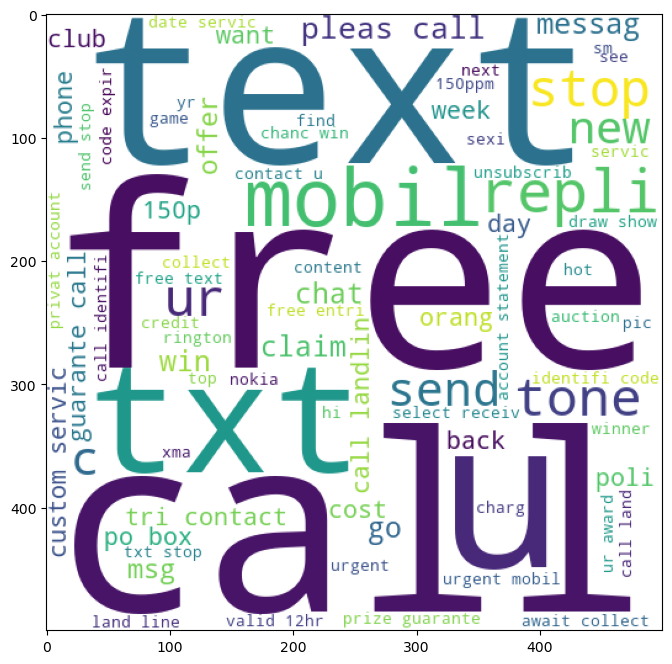

In [301]:
spam_wc = wc.generate(df[df["Target"] == 1]["Transformed_Mails"].str.cat(sep = " "))
plt.figure(figsize = (12, 8))
plt.imshow(spam_wc)

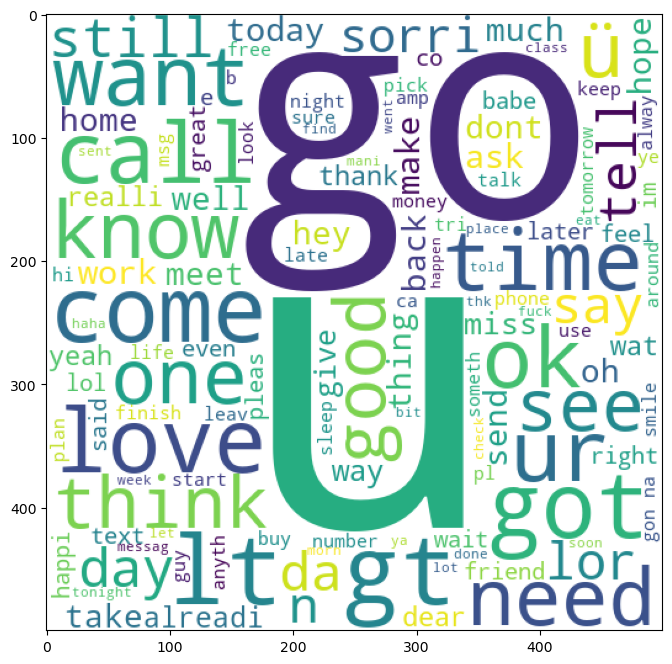

In [302]:
#hams
wc_hams = wc.generate(df[df["Target"] == 0]["Transformed_Mails"].str.cat(sep = " "))
plt.figure(figsize = (12,8))
plt.imshow(wc_hams)

In [303]:
#finding top 50 words of spam and ham
spam_corpus = []
for message in df[df["Target"] == 1]["Transformed_Mails"].tolist():
    for word in message.split():
        spam_corpus.append(word)

In [304]:
len(spam_corpus)

9781

In [305]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,311
1,free,186
2,2,154
3,txt,139
4,text,122
5,ur,119
6,u,115
7,mobil,110
8,stop,108
9,repli,103


In [308]:
ham_corpus = []
for messages in df[df["Target"] == 0]["Transformed_Mails"].tolist():
    for word in messages.split():
        ham_corpus.append(word)

In [309]:
pd.DataFrame(Counter(ham_corpus).most_common(30))

,0,1
0,u,897
1,go,407
2,get,351
3,2,288
4,gt,288
5,lt,287
6,come,278
7,got,239
8,know,237
9,like,236


## 4: Model Building

In [310]:
df.head()


,Target,Mails,num_of_char,num_of_words,num_of_sent,Transformed_Mails
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [311]:
#vectorization by bagofwords and tfidf vectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()
x = tfidf.fit_transform(df["Transformed_Mails"]).toarray()

In [312]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [313]:
x.shape

(5157, 6781)

In [314]:
y = df["Target"].values

In [315]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [316]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [317]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [318]:
gnb.fit(x_train, y_train)
y_pred1 = gnb.predict(x_test)

In [319]:
#model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [321]:
print("Gaussian Naive Bayes")
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

Gaussian Naive Bayes
0.8691860465116279
[[787 118]
 [ 17 110]]
0.4824561403508772


In [322]:
mnb.fit(x_train, y_train)
y_pred2 = mnb.predict(x_test)

In [323]:
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9612403100775194
[[905   0]
 [ 40  87]]
1.0


In [324]:
bnb.fit(x_train, y_train)
y_pred3 = bnb.predict(x_test)

In [325]:
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9718992248062015
[[902   3]
 [ 26 101]]
0.9711538461538461


# hence tfidf and multinomial naive bayes are selected

In [327]:
import pickle
pickle.dump(tfidf, open("vectorizer.pkl", "wb"))
pickle.dump(mnb, open("model.pkl", "wb"))

In [329]:
model = mnb
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)